# More Advanced Clustering Demo

In this demo, we will step through different algorithms and see performance on different 2D data sets.

Some code was manipulated from http://nbviewer.ipython.org/github/mgrani/LODA-lecture-notes-on-data-analysis/blob/master/2.ML-and-DM/2.ML-and-DM-Clustering-with-scikit-learn.ipynb and also taken from sciki-learn's online documentation and example tutorials, http://scikit-learn.org/stable/index.html.

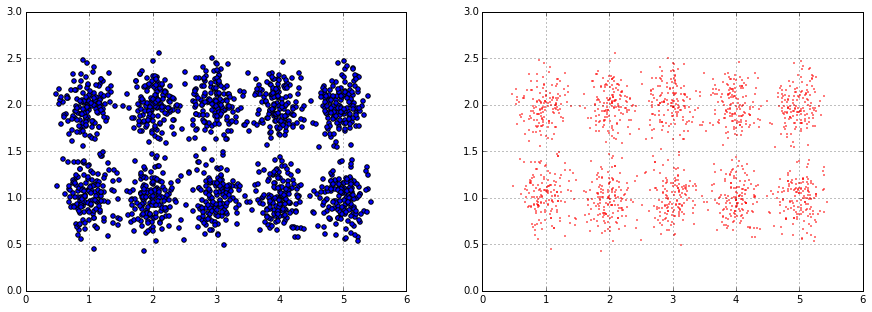

In [6]:
# getting things started
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np

# generate some sample data
n_samples = 1500
np.random.seed(0)

X1 = np.array([[1.0,1], [1,2], [2,1], [2,2], [3,1], [3,2], [4,1], [4,2], [5,1], [5,2]]) # cluster prototypes
X1 = np.repeat(X1, 150, axis=0)
X1 += .2 * np.random.randn(X1.shape[0],2) # add some randomness

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1])
plt.grid()
plt.subplot(1,2,2)
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.grid()

plt.show()

This data should be relatively easy to cluster. The density of each cluster is constant and it has ten distinct clusters. There is some overlap, but by and large, the overall clusters are visually obvious.

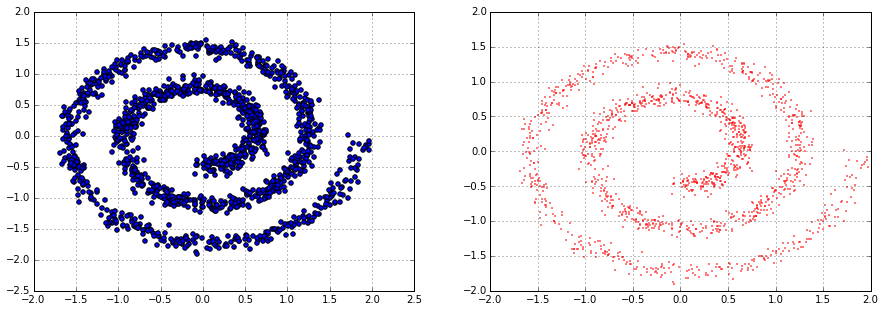

In [7]:
# Generate some harder sample data
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t) / 10.0
y = t * np.sin(t) / 10.0

X2 = np.concatenate((x, y))
X2 += .07 * np.random.randn(2, n_samples) # add some randomness
X2 = X2.T # and transpose it

# and then lets plot it
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X2[:, 0], X2[:, 1])
plt.grid()
plt.subplot(1,2,2)
plt.plot(X2[:, 0], X2[:, 1], 'r.', markersize=2) #plot the data
plt.grid()

plt.show()

This data set is more difficult to cluster as it has a differing shape constraint. However there is very little overlap between the clusters so it is quite distinct and visually obvious.

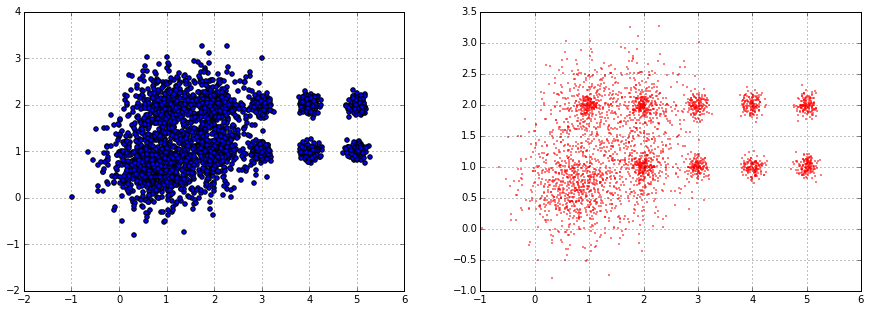

In [26]:
X3 = np.array([[0.75,0.75],[0.75,0.75], [1,2], [2,1], [2,2], [3,1], [3,2], [4,1], [4,2], [5,1], [5,2]]) # cluster prototypes
X3 = np.repeat(X3, 150, axis=0)
X3 += .1 * np.random.randn(X3.shape[0],2) # add some randomness
X3[0:300] += .3 * np.random.randn(300,2)

Xtmp1 = X3[0:750] + .4 * np.random.randn(750,2) # create some spread in the points
Xtmp2 = X3[0:750] + .4 * np.random.randn(750,2) # create some spread in the points
X3 = np.concatenate((X3,Xtmp1,Xtmp2)) # and add them back in for differing density


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X3[:, 0], X3[:, 1])
plt.grid()
plt.subplot(1,2,2)
plt.plot(X3[:, 0], X3[:, 1], 'r.', markersize=2) #plot the data
plt.grid()

plt.show()

Here also the clusters are visually obvious, but the density of each cluster is now different. Some clusters contain many points, while others contain a fraction of the number of points. Also, the first cluster has double the number of points than other clusters.

In [5]:
from sklearn.neighbors import kneighbors_graph

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(X1, 5)
X2_knn_graph = kneighbors_graph(X2, 5) 
X3_knn_graph = kneighbors_graph(X3, 5)

/Library/Python/2.7/site-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


# Gaussian Mixture Models

In [6]:
# this code has been manipulated from the source available on sklearn's website documentation
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

X = X2

lowest_bic = np.infty
bic = []
n_components_range = range(7, 17)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


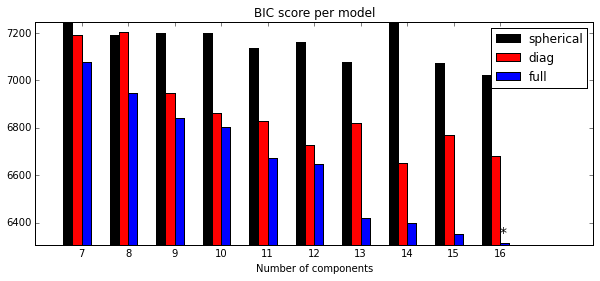

In [7]:
# plot the BIC
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
clf = best_gmm
bars = []

plt.figure(figsize=(10,4))
spl = plt.subplot(1,1,1)
# Plot the BIC scores
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')

xpos = np.min(n_components_range)-0.4 + np.mod(bic.argmin(), len(n_components_range)) +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

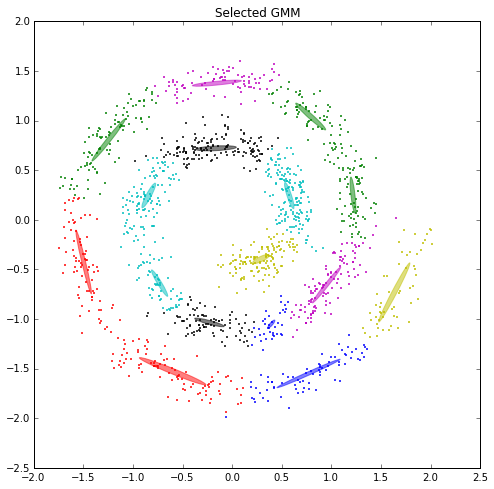

In [8]:
# Plot the winner
plt.figure(figsize=(8,8))
splot = plt.subplot(1,1,1)
Y_ = clf.predict(X)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covars_,
                                             color_iter)):
    if len(covar.shape)==1:
        tmp = np.zeros((2,2))
        np.fill_diagonal(tmp,covar)
        covar = tmp
    elif covar.shape[0] != covar.shape[1]:
        covar = np.diag(covar)
        
    v, w = linalg.eigh(covar)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)


plt.title('Selected GMM')
plt.show()

#Spectral Clustering
Spectal clustering can be a powerful tool for clustering using many of the same methods we have already talked about in a different space.

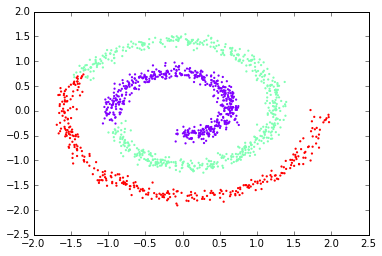

In [31]:
# an example using SpectralClustering, which assumes that the graphical data needs to be calculated from the structure
from sklearn.cluster import SpectralClustering

X = X2

spc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()

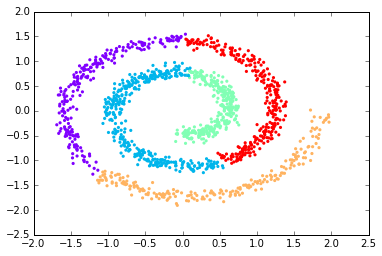

In [35]:
# an example using precomputed affinity, which uses the actual proximity graph
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

X = X2
Xknn = kneighbors_graph(X, 10) 

spc = SpectralClustering(n_clusters=5, affinity = 'precomputed')
labels = spc.fit_predict(Xknn) 

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=10, linewidths=0)

plt.show()

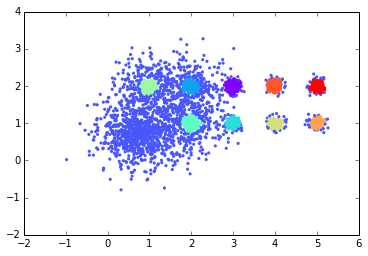

In [40]:
from sklearn.metrics.pairwise import pairwise_distances

X = X3
d = pairwise_distances(X, metric='euclidean')
d = np.exp(- d**2 / (2.* 0.1**2))

spc = SpectralClustering(n_clusters=10, affinity = 'precomputed', eigen_solver = 'arpack')
labels = spc.fit_predict(d) 

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=10, linewidths=0)

plt.show()

#Image Segmentation with Spectral Clustering

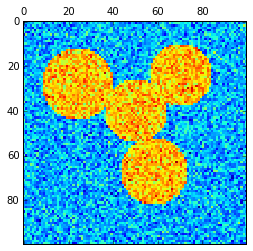

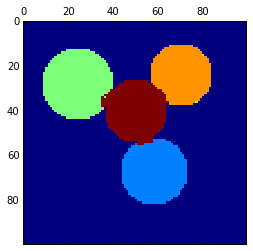

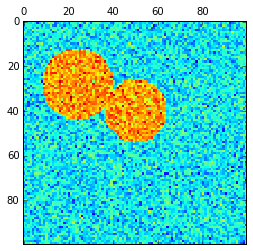

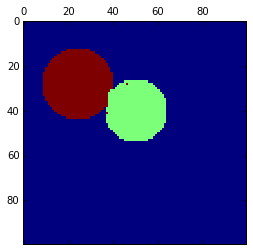

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image

###############################################################################
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

###############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Force the solver to be arpack, since amg is numerically
# unstable on this example
spc = SpectralClustering(n_clusters=4, affinity = 'precomputed', eigen_solver='arpack')
labels = spc.fit_predict(graph)
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

###############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)

spc = SpectralClustering(n_clusters=2, affinity = 'precomputed', eigen_solver='arpack')
labels = spc.fit_predict(graph)
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

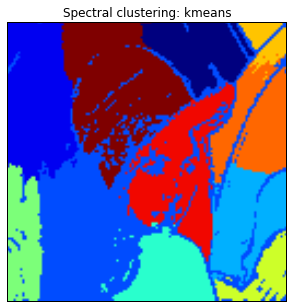

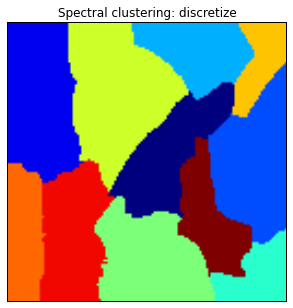

In [2]:
from sklearn.feature_extraction import image
import numpy as np
import scipy as sp

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction import image

%matplotlib inline

lena = sp.misc.lena()
# Downsample the image by a factor of 4
lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(lena)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / lena.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 11

###############################################################################
# Visualize the resulting regions
for assign_labels in ('kmeans', 'discretize'):
    spc = SpectralClustering(n_clusters=N_REGIONS, 
                             affinity = 'precomputed', 
                             eigen_solver='arpack',
                             assign_labels=assign_labels)
    labels = spc.fit_predict(graph)
    labels = labels.reshape(lena.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(lena,   cmap=plt.cm.gray)
    plt.imshow(labels)
    
    plt.xticks(())
    plt.yticks(())
    plt.title('Spectral clustering: %s' % (assign_labels))

plt.show()

#What if we have a lot of data?
Graphlab create to the rescue, but only for kmeans clustering using kmeans++. 
https://dato.com/products/create/docs/index.html

In [3]:
# A tast of using graphlab with k-means clustering
# note that SFrames are powerful datatypes that are dynamic to the environment
# they also basically work like pandas and scikit-learn
import graphlab as gl
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

In [15]:
XS = gl.SFrame(data=X1)
print XS
XS['X1'].show()

+--------------------------------+
|               X1               |
+--------------------------------+
| [1.35281046919, 1.08003144167] |
| [1.19574759682, 1.44817863984] |
| [1.37351159803, 0.80454442...  |
| [1.19001768351, 0.96972855834] |
| [0.979356229641, 1.0821197...  |
| [1.02880871423, 1.29085470139] |
| [1.15220754503, 1.0243350033]  |
| [1.08877264655, 1.06673486547] |
| [1.29881581463, 0.95896834...  |
| [1.06261354033, 0.82918085214] |
|              ...               |
+--------------------------------+
[1500 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


<IPython.core.display.Javascript object>

In [19]:
model = gl.kmeans.create(XS, num_clusters=10)
model.summary()

PROGRESS: Choosing cluster centers randomly.
PROGRESS: choosing cluster center number: 0
PROGRESS: k-means++ initialize center 0 : 83
PROGRESS: choosing cluster center number: 1
PROGRESS: k-means++ initialize center 1 : 1466
PROGRESS: choosing cluster center number: 2
PROGRESS: k-means++ initialize center 2 : 153
PROGRESS: choosing cluster center number: 3
PROGRESS: k-means++ initialize center 3 : 961
PROGRESS: choosing cluster center number: 4
PROGRESS: k-means++ initialize center 4 : 421
PROGRESS: choosing cluster center number: 5
PROGRESS: k-means++ initialize center 5 : 1093
PROGRESS: choosing cluster center number: 6
PROGRESS: k-means++ initialize center 6 : 831
PROGRESS: choosing cluster center number: 7
PROGRESS: k-means++ initialize center 7 : 307
PROGRESS: choosing cluster center number: 8
PROGRESS: k-means++ initialize center 8 : 496
PROGRESS: choosing cluster center number: 9
PROGRESS: k-means++ initialize center 9 : 1201
PROGRESS: Done with initialization.
PROGRESS: Trainin

In [20]:
labels_as_sframe = model.get('cluster_id')
labels_as_sframe.show()

<IPython.core.display.Javascript object>

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]


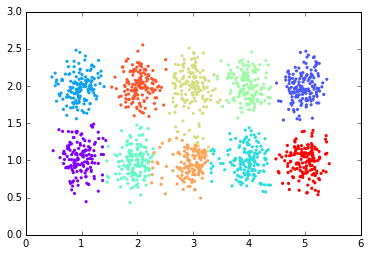

In [21]:
X = np.array(XS['X1'])
print labels_as_sframe['cluster_id']
plt.scatter(X[:, 0], X[:, 1], c=labels_as_sframe['cluster_id'],
                    cmap=plt.cm.rainbow, s=10, linewidths=0)

plt.show()